In [1]:
import os
from pprint import pprint

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import VotingClassifier


# 필요 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris  # Iris 데이터셋 예시로 사용

In [2]:
train_data = pd.read_csv("/content/drive/MyDrive/쿠글 1차 프로젝트/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/쿠글 1차 프로젝트/test.csv")

In [3]:
print(train_data.shape)
print(test_data.shape)

(3116945, 22)
(2077964, 21)


In [4]:
# null 값이 있는 컬럼 및 개수 확
null_columns = train_data.isnull().sum()

# null 값이 있는 컬럼만 필터링
null_columns_with_data = null_columns[null_columns > 0]

# null 값이 있는 컬럼과 해당 null 값의 개수를 출력
print("Null 값이 있는 컬럼과 그 개수:")
print(null_columns_with_data)

# null 값이 있는 컬럼의 수를 출력
print(f"\nNull 값이 있는 컬럼의 수: {len(null_columns_with_data)}")

Null 값이 있는 컬럼과 그 개수:
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
dtype: int64

Null 값이 있는 컬럼의 수: 17


In [5]:
# 결측값 50% 이상 컬럼 제거
columns_to_drop = ['stem-root', 'stem-surface', 'veil-type', 'veil-color', 'spore-print-color']

# train_data에서 해당 컬럼 삭제
train_data = train_data.drop(columns=columns_to_drop)

print(train_data.shape)

(3116945, 17)


In [6]:
# 컬럼별 고윳값 출력
unique_counts = train_data.nunique()

print(unique_counts)

id                      3116945
class                         2
cap-diameter               3913
cap-shape                    74
cap-surface                  83
cap-color                    78
does-bruise-or-bleed         26
gill-attachment              78
gill-spacing                 48
gill-color                   63
stem-height                2749
stem-width                 5836
stem-color                   59
has-ring                     23
ring-type                    40
habitat                      52
season                        4
dtype: int64


In [7]:
# 'stem-root', 'stem-surface', 'veil-type', 'veil-color', 'spore-print-color' 제거 후

'''

id = 버섯 식별 번호
class = target 컬럼

cap-diameter = 버섯 모자 지름
cap-shape = 버섯 모자 모양
cap-surface = 버섯 모자 표면 질감
cap-color = 버섯 모자 색상

does-bruise-or-bleed = 버섯에 멍이 있거나 즙이 나는지 여부. 특정 버섯은 상처가 나면 색이 변할수도

gill-attachment = 버섯 자루의 주름(?)
gill-spacing = 버섯 주름의 간격
gill-color = 버섯 자루의 색상

stem-height = 버섯 자루 높이
stem-width = 버섯 자루 너비
stem-color = 버섯 자루 색상

has-ring = 버섯 자루에 고리 유무
ring-type = 고리의 유형

habitat = 버섯 거주지
season = 버섯이 자라는 계절

'''



'\n\nid = 버섯 식별 번호\nclass = target 컬럼\n\ncap-diameter = 버섯 모자 지름\ncap-shape = 버섯 모자 모양\ncap-surface = 버섯 모자 표면 질감\ncap-color = 버섯 모자 색상\n\ndoes-bruise-or-bleed = 버섯에 멍이 있거나 즙이 나는지 여부. 특정 버섯은 상처가 나면 색이 변할수도\n\ngill-attachment = 버섯 자루의 주름(?)\ngill-spacing = 버섯 주름의 간격\ngill-color = 버섯 자루의 색상\n\nstem-height = 버섯 자루 높이\nstem-width = 버섯 자루 너비\nstem-color = 버섯 자루 색상\n\nhas-ring = 버섯 자루에 고리 유무\nring-type = 고리의 유형\n\nhabitat = 버섯 거주지\nseason = 버섯이 자라는 계절\n\n'

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 17 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-color            object 
 13  has-ring              object 
 14  ring-type             object 
 15  habitat               object 
 16  season                object 
dtypes: float64(3), int64(1), object(13)
memory usage: 404.3+ MB


In [9]:
display(train_data.head(20))

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,4.51,15.39,w,f,f,d,a
1,1,p,4.51,x,h,o,f,a,c,n,4.79,6.48,o,t,z,d,w
2,2,e,6.94,f,s,b,f,x,c,w,6.85,9.93,n,f,f,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,4.16,6.53,w,f,f,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,3.37,8.36,w,f,f,g,a
5,5,p,4.30,x,t,n,f,s,c,n,5.91,8.20,w,t,z,d,a
6,6,e,9.65,p,y,w,f,e,c,k,19.07,12.69,w,t,e,g,w
7,7,p,4.55,x,e,e,f,a,NaN,y,8.31,9.77,y,t,z,d,a
8,8,p,7.36,f,h,e,f,x,d,w,5.77,17.13,w,f,f,d,a
9,9,e,6.45,x,t,n,f,a,d,w,7.13,12.77,e,f,f,d,a


#object -> int 변환 (label encoding)

In [10]:
df=train_data
from sklearn.preprocessing import LabelEncoder

# Map the target to numbers.
df['class'] = df['class'].replace({'p': 1, 'e': 0})
def encode(df):
    for col in df.columns:
        if df[col].dtype == 'object' or df[col].dtype.name == 'category':
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
    return df

<ipython-input-10-f1b3e97f0079>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace({'p': 1, 'e': 0})


In [11]:
test_encoded = encode(test_data)
test_encoded.head()

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,3116945,8.64,59,59,44,18,66,35,52,11.13,...,9,54,51,12,21,17,15,33,16,0
1,3116946,6.90,50,53,45,5,66,17,54,1.27,...,31,54,38,15,23,6,14,33,16,0
2,3116947,2.00,36,38,44,5,66,17,41,6.18,...,31,54,38,15,23,6,14,33,16,1
3,3116948,3.47,59,53,44,5,57,17,41,4.98,...,31,54,51,15,14,17,35,33,16,2
4,3116949,6.17,59,39,55,5,55,35,54,6.73,...,31,54,53,15,22,17,36,33,16,2


In [12]:
train_encoded = encode(df)
train_encoded.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,0,0,8.80,53,72,72,8,44,28,59,4.51,15.39,55,5,18,25,0
1,1,1,4.51,71,56,64,8,44,28,46,4.79,6.48,47,18,39,25,3
2,2,0,6.94,53,72,49,8,75,28,59,6.85,9.93,46,5,18,36,3
3,3,0,3.88,53,81,57,8,70,48,37,4.16,6.53,55,5,18,25,2
4,4,0,5.85,71,65,74,8,47,48,59,3.37,8.36,55,5,18,29,0


In [13]:
test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2077964 entries, 0 to 2077963
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   cap-diameter          float64
 2   cap-shape             int64  
 3   cap-surface           int64  
 4   cap-color             int64  
 5   does-bruise-or-bleed  int64  
 6   gill-attachment       int64  
 7   gill-spacing          int64  
 8   gill-color            int64  
 9   stem-height           float64
 10  stem-width            float64
 11  stem-root             int64  
 12  stem-surface          int64  
 13  stem-color            int64  
 14  veil-type             int64  
 15  veil-color            int64  
 16  has-ring              int64  
 17  ring-type             int64  
 18  spore-print-color     int64  
 19  habitat               int64  
 20  season                int64  
dtypes: float64(3), int64(18)
memory usage: 332.9 MB


# 주성분 분석(PCA)를 통해 차원 축소

In [14]:
df.isna().sum() # 각 열에 NaN 값이 몇 개 있는지 확인

,0
id,0
class,0
cap-diameter,4
cap-shape,0
cap-surface,0
cap-color,0
does-bruise-or-bleed,0
gill-attachment,0
gill-spacing,0
gill-color,0


In [15]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# 1. 데이터 전처리: NaN 값 제거 및 표준화
df = df.dropna()  # NaN 값을 포함한 행 제거
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# 2. PCA 수행 (모든 주성분을 계산)
pca = PCA()
pca.fit(df_scaled)

# 3. 주성분의 로드 값 계산
# 로드 값은 주성분 행렬과 원본 변수 간의 관계를 나타냄
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(df.shape[1])], index=df.columns)

# 4. 결과 출력: 각 주성분이 원본 변수에 대해 설명하는 정도
print("각 주성분의 로드 값 (loading scores):")
print(loadings)

각 주성분의 로드 값 (loading scores):
                           PC1       PC2       PC3       PC4       PC5  \
id                    0.000219 -0.001453 -0.001875  0.000944  0.005371   
class                -0.138495  0.166124 -0.165031  0.141104 -0.341329   
cap-diameter          0.499398 -0.218896  0.083300 -0.006339  0.151135   
cap-shape             0.205744 -0.058877 -0.287117 -0.379111 -0.161019   
cap-surface           0.091262  0.034103  0.352330  0.195311  0.169998   
cap-color             0.068549  0.157998  0.354867 -0.307667 -0.406862   
does-bruise-or-bleed  0.245135 -0.210389 -0.230577 -0.187446 -0.051826   
gill-attachment       0.050020  0.012232  0.194775  0.613871 -0.237998   
gill-spacing          0.120115 -0.062290 -0.397078  0.215525 -0.195174   
gill-color            0.195857 -0.020798  0.194609 -0.324150 -0.292037   
stem-height           0.404655  0.126387 -0.018656  0.293686  0.074577   
stem-width            0.492985 -0.264265  0.117866  0.043547  0.130948   
stem-col

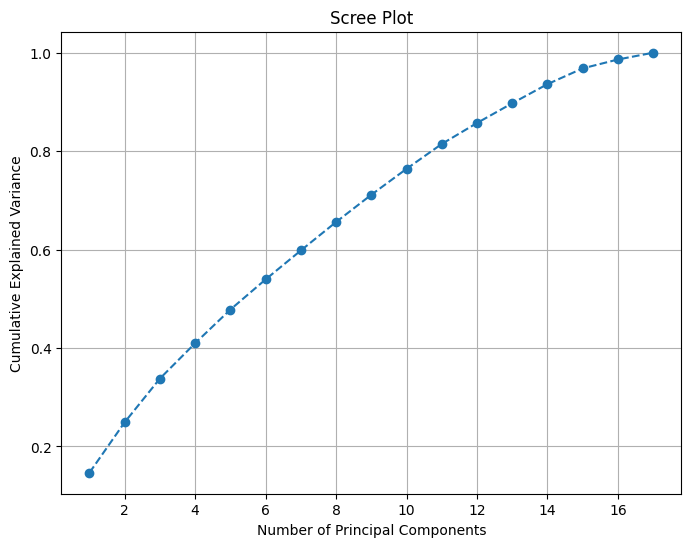

95% 이상 설명하는 주성분의 수: 15


In [16]:
# 설명된 분산 비율 확인
explained_variance = pca.explained_variance_ratio_

# 누적 설명된 분산 비율
cumulative_variance = np.cumsum(explained_variance)

# Scree Plot 생성 (엘보우 기법)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# 누적 설명된 분산이 95% 이상인 주성분 선택
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"95% 이상 설명하는 주성분의 수: {n_components}")

In [17]:
df.drop(columns=['id', 'gill-attachment', 'ring-type'], inplace=True)

<ipython-input-17-8e3d9b4f0d95>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['id', 'gill-attachment', 'ring-type'], inplace=True)


In [18]:
display(df.head(20))

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,season
0,0,8.80,53,72,72,8,28,59,4.51,15.39,55,5,25,0
1,1,4.51,71,56,64,8,28,46,4.79,6.48,47,18,25,3
2,0,6.94,53,72,49,8,28,59,6.85,9.93,46,5,36,3
3,0,3.88,53,81,57,8,48,37,4.16,6.53,55,5,25,2
4,0,5.85,71,65,74,8,48,59,3.37,8.36,55,5,29,0
5,1,4.30,71,76,63,8,28,46,5.91,8.20,55,18,25,0
6,0,9.65,64,81,74,8,28,43,19.07,12.69,55,18,29,3
7,1,4.55,71,53,55,8,48,61,8.31,9.77,57,18,25,0
8,1,7.36,53,56,55,8,31,59,5.77,17.13,55,5,25,0
9,0,6.45,71,76,63,8,31,59,7.13,12.77,35,5,25,0


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# 가정: df는 train_data이고 test_data에는 class 컬럼이 없음
# 'class' 컬럼이 독버섯 여부 (1=독버섯, 0=식용버섯)를 나타내므로 종속 변수로 사용

# train_data에서 독립 변수와 종속 변수 분리
X_train = df.drop(columns=['class'])
y_train = df['class']

# 초기 회귀 모델 정의 및 학습
initial_model = RandomForestRegressor(random_state=42)
initial_model.fit(X_train, y_train)

# test_data로 예측 (독버섯 여부를 예측)
y_pred_initial = initial_model.predict(test_data)

# 예측 결과를 이진 분류 형태로 변환 (0.5 기준으로 독/식용 분류)
y_pred_initial_class = [1 if pred >= 0.5 else 0 for pred in y_pred_initial]
print("초기 모델의 예측 결과 (독버섯 여부):", y_pred_initial_class)

# 파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV를 사용한 하이퍼파라미터 튜닝
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1,
                           verbose=2)
grid_search.fit(X_train, y_train)

# 최적 모델로 test_data 예측
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(test_data)

# 최적 모델 예측 결과를 이진 분류로 변환
y_pred_best_class = [1 if pred >= 0.5 else 0 for pred in y_pred_best]
print("최적 모델의 예측 결과 (독버섯 여부):", y_pred_best_class)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- gill-attachment
- id
- ring-type
- spore-print-color
- stem-root
- ...


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# 가정: df는 train_data이고 test_data에는 class 컬럼이 없음
# 'class' 컬럼이 독버섯 여부 (1=독버섯, 0=식용버섯)를 나타내므로 종속 변수로 사용

# train_data에서 독립 변수와 종속 변수 분리
X_train = df.drop(columns=['class'])
y_train = df['class']

# PCA 적용 (설명된 분산의 95%까지 주성분 사용)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(test_data)  # test_data에도 동일하게 PCA 적용

# 초기 회귀 모델 정의 및 학습
initial_model = RandomForestRegressor(random_state=42)
initial_model.fit(X_train_pca, y_train)

# test_data로 예측 (독버섯 여부를 예측)
y_pred_initial = initial_model.predict(X_test_pca)

# 예측 결과를 이진 분류 형태로 변환 (0.5 기준으로 독/식용 분류)
y_pred_initial_class = [1 if pred >= 0.5 else 0 for pred in y_pred_initial]
print("초기 모델의 예측 결과 (독버섯 여부):", y_pred_initial_class)

# 파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV를 사용한 하이퍼파라미터 튜닝
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1,
                           verbose=2)
grid_search.fit(X_train_pca, y_train)

# 최적 모델로 test_data 예측
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_pca)

# 최적 모델 예측 결과를 이진 분류로 변환
y_pred_best_class = [1 if pred >= 0.5 else 0 for pred in y_pred_best]
print("최적 모델의 예측 결과 (독버섯 여부):", y_pred_best_class)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- spore-print-color
- stem-root
- stem-surface
- veil-color
- veil-type


In [ ]:
test_data.isna().sum()

,0
id,0
cap-diameter,7
cap-shape,0
cap-surface,0
cap-color,0
does-bruise-or-bleed,0
gill-attachment,0
gill-spacing,0
gill-color,0
stem-height,1


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# 가정: df는 train_data이고 test_data에는 class 컬럼이 없음
# 'class' 컬럼이 독버섯 여부 (1=독버섯, 0=식용버섯)를 나타내므로 종속 변수로 사용

# 공통 피처만 선택
common_features = df.columns.intersection(test_data.columns)
X_train = df[common_features].drop(columns=['class'], errors='ignore')
y_train = df['class']
X_test = test_data[common_features]

# 결측값 처리 - 'stem-height'와 'cap-diameter'의 NaN 값을 평균으로 대체
for col in ['stem-height', 'cap-diameter']:
    if col in X_test.columns:
        X_test[col].fillna(X_test[col].mean(), inplace=True)

# PCA 적용 (설명된 분산의 95%까지 주성분 사용)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)  # test_data에도 동일하게 PCA 적용

# 초기 회귀 모델 정의 및 학습
initial_model = RandomForestRegressor(random_state=42)
initial_model.fit(X_train_pca, y_train)

# test_data로 예측 (독버섯 여부를 예측)
y_pred_initial = initial_model.predict(X_test_pca)

# 예측 결과를 이진 분류 형태로 변환 (0.5 기준으로 독/식용 분류)
y_pred_initial_class = [1 if pred >= 0.5 else 0 for pred in y_pred_initial]
print("초기 모델의 예측 결과 (독버섯 여부):", y_pred_initial_class)

# 파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV를 사용한 하이퍼파라미터 튜닝
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1,
                           verbose=2)
grid_search.fit(X_train_pca, y_train)

# 최적 모델로 test_data 예측
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_pca)

# 최적 모델 예측 결과를 이진 분류로 변환
y_pred_best_class = [1 if pred >= 0.5 else 0 for pred in y_pred_best]
print("최적 모델의 예측 결과 (독버섯 여부):", y_pred_best_class)

<ipython-input-25-07f5399d3e1a>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test[col].fillna(X_test[col].mean(), inplace=True)
<ipython-input-25-07f5399d3e1a>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col].fillna(X_test[col].mean(), inplace=True)
